# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

04:59:55 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=902195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=690493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=336087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=764882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=317345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=528463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

04:59:57 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=419712;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=224794;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=979656;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=418962;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

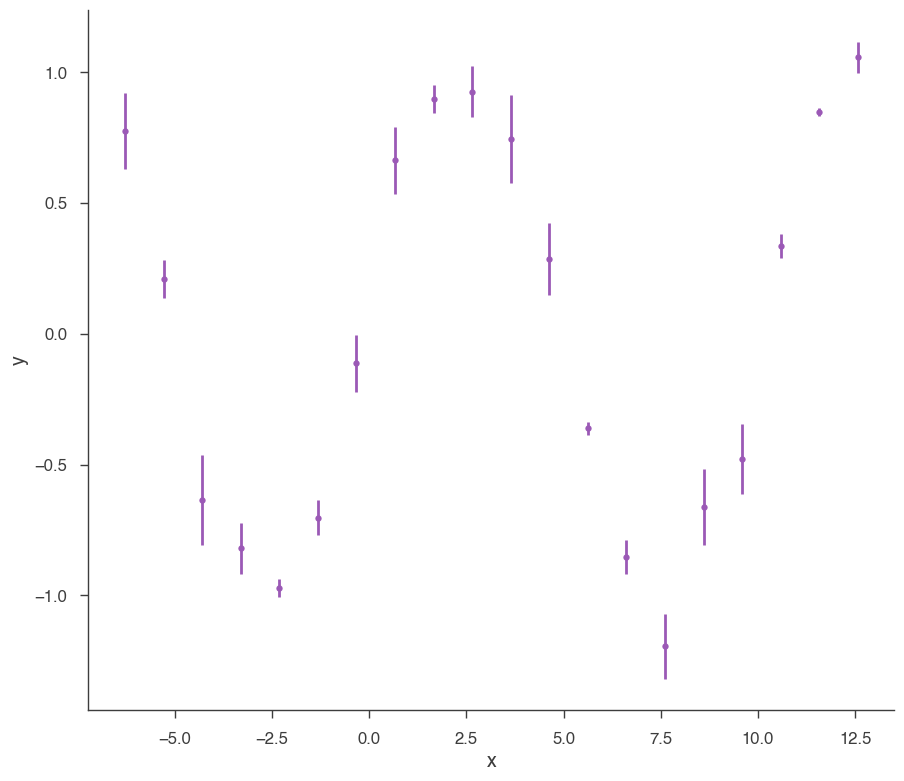

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=962193;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=196060;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

05:00:00 INFO      Mean acceptance fraction: 0.7154999999999998                                ]8;id=43250;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=767869;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=551072;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=589676;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=736737;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=967634;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 -0.019 +0.021,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.241108
total,-8.241108


Values of statistical measures:

,statistical measures
AIC,21.188098
BIC,22.473680
DIC,20.533738
PDIC,2.022133


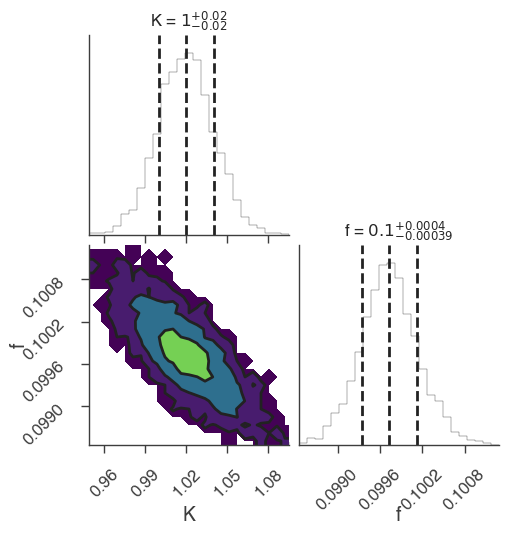

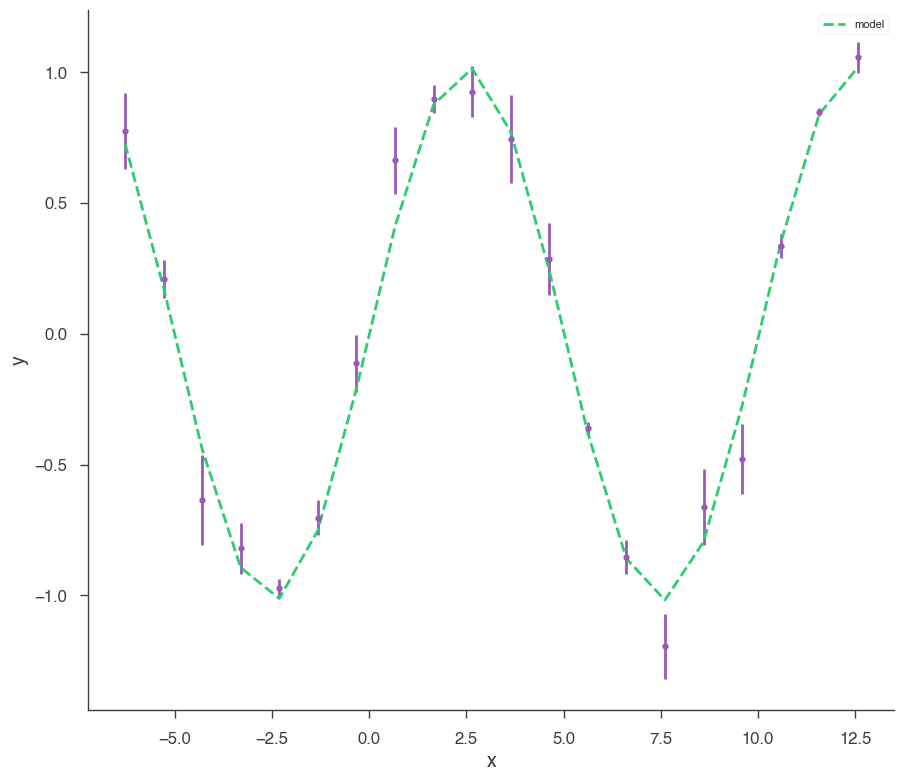

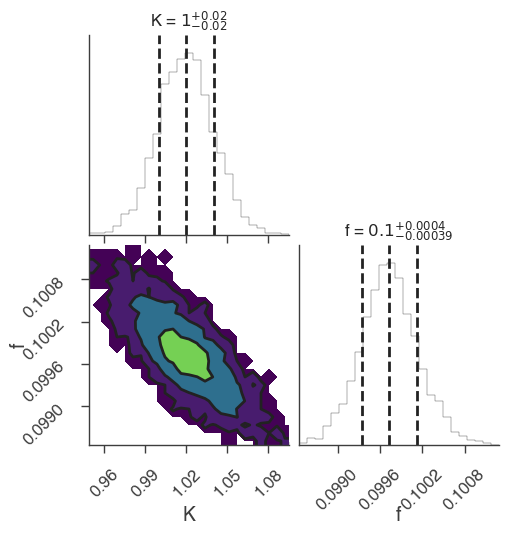

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

05:00:01 INFO      sampler set to multinest                                                ]8;id=686181;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=276701;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -18.047854686033347      +/-  0.14810753027041096     
 Total Likelihood Evaluations:         5566
 Sampling finished. Exiting MultiNest



05:00:02 INFO      fit restored to maximum of posterior                                         ]8;id=987013;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=707822;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=321444;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=131885;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.018 -0.020 +0.022,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.241838
total,-8.241838


Values of statistical measures:

,statistical measures
AIC,21.189558
BIC,22.475140
DIC,20.587985
PDIC,2.051436
log(Z),-7.838084


         INFO      deleting the chain directory chains                                     ]8;id=669886;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=781128;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

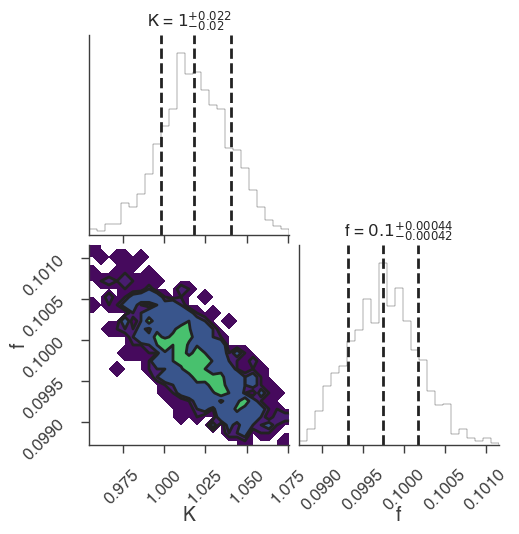

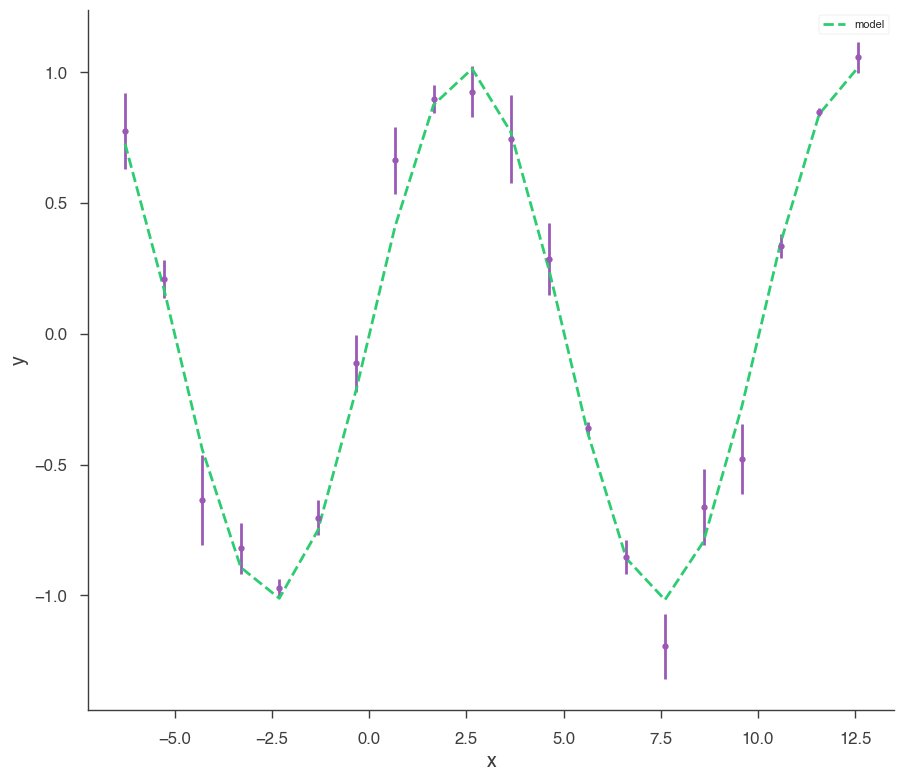

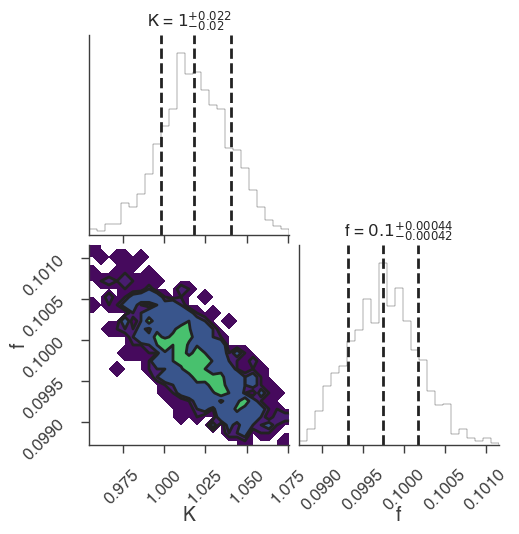

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

05:00:03 INFO      sampler set to dynesty_nested                                           ]8;id=165841;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=81037;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

245it [00:00, 2444.77it/s, bound: 0 | nc: 1 | ncall: 744 | eff(%): 32.930 | loglstar:   -inf < -4410.569 <    inf | logz: -4417.830 +/-  0.133 | dlogz: 4398.142 >  0.409]

490it [00:00, 1902.24it/s, bound: 0 | nc: 1 | ncall: 1408 | eff(%): 34.801 | loglstar:   -inf < -2504.450 <    inf | logz: -2511.843 +/-  0.130 | dlogz: 2488.931 >  0.409]

688it [00:00, 1445.72it/s, bound: 0 | nc: 5 | ncall: 2337 | eff(%): 29.439 | loglstar:   -inf < -1925.081 <    inf | logz: -1932.888 +/-  0.135 | dlogz: 1920.559 >  0.409]

845it [00:00, 1174.37it/s, bound: 0 | nc: 8 | ncall: 3520 | eff(%): 24.006 | loglstar:   -inf < -1695.124 <    inf | logz: -1702.848 +/-  0.138 | dlogz: 1692.986 >  0.409]

973it [00:00, 980.60it/s, bound: 0 | nc: 1 | ncall: 4669 | eff(%): 20.840 | loglstar:   -inf < -1519.619 <    inf | logz: -1528.592 +/-  0.145 | dlogz: 1519.561 >  0.409] 

1079it [00:00, 840.51it/s, bound: 0 | nc: 2 | ncall: 6019 | eff(%): 17.927 | loglstar:   -inf < -1395.231 <    inf | logz: -1403.010 +/-  0.137 | dlogz: 1391.950 >  0.409]

1169it [00:01, 760.38it/s, bound: 0 | nc: 11 | ncall: 7455 | eff(%): 15.681 | loglstar:   -inf < -981.403 <    inf | logz: -990.941 +/-  0.153 | dlogz: 982.619 >  0.409]  

1249it [00:01, 631.91it/s, bound: 0 | nc: 42 | ncall: 9261 | eff(%): 13.487 | loglstar:   -inf < -764.811 <    inf | logz: -773.858 +/-  0.148 | dlogz: 763.214 >  0.409]

1316it [00:01, 537.95it/s, bound: 0 | nc: 11 | ncall: 10889 | eff(%): 12.086 | loglstar:   -inf < -613.917 <    inf | logz: -623.669 +/-  0.152 | dlogz: 613.530 >  0.409]

1373it [00:01, 409.81it/s, bound: 0 | nc: 64 | ncall: 12556 | eff(%): 10.935 | loglstar:   -inf < -532.640 <    inf | logz: -541.747 +/-  0.146 | dlogz: 530.229 >  0.409]

1419it [00:02, 302.44it/s, bound: 1 | nc: 1 | ncall: 14152 | eff(%): 10.027 | loglstar:   -inf < -474.129 <    inf | logz: -484.067 +/-  0.152 | dlogz: 473.433 >  0.409] 

1601it [00:02, 532.13it/s, bound: 1 | nc: 4 | ncall: 14540 | eff(%): 11.011 | loglstar:   -inf < -283.068 <    inf | logz: -292.608 +/-  0.149 | dlogz: 280.966 >  0.409]

1682it [00:02, 525.68it/s, bound: 2 | nc: 4 | ncall: 14764 | eff(%): 11.393 | loglstar:   -inf < -225.580 <    inf | logz: -234.875 +/-  0.146 | dlogz: 222.757 >  0.409]

1871it [00:02, 779.76it/s, bound: 2 | nc: 2 | ncall: 15144 | eff(%): 12.355 | loglstar:   -inf < -144.389 <    inf | logz: -153.750 +/-  0.144 | dlogz: 140.957 >  0.409]

1978it [00:02, 736.17it/s, bound: 3 | nc: 1 | ncall: 15393 | eff(%): 12.850 | loglstar:   -inf < -111.583 <    inf | logz: -121.012 +/-  0.147 | dlogz: 107.912 >  0.409]

2174it [00:02, 990.73it/s, bound: 3 | nc: 1 | ncall: 15761 | eff(%): 13.794 | loglstar:   -inf < -72.987 <    inf | logz: -82.490 +/-  0.146 | dlogz: 68.831 >  0.409]   

2299it [00:02, 895.32it/s, bound: 4 | nc: 1 | ncall: 16036 | eff(%): 14.336 | loglstar:   -inf < -55.973 <    inf | logz: -65.784 +/-  0.145 | dlogz: 51.791 >  0.409]

2493it [00:03, 1122.31it/s, bound: 4 | nc: 3 | ncall: 16413 | eff(%): 15.189 | loglstar:   -inf < -36.684 <    inf | logz: -46.123 +/-  0.146 | dlogz: 31.617 >  0.409]

2627it [00:03, 956.46it/s, bound: 5 | nc: 2 | ncall: 16660 | eff(%): 15.768 | loglstar:   -inf < -28.718 <    inf | logz: -38.568 +/-  0.147 | dlogz: 23.799 >  0.409] 

2814it [00:03, 1151.90it/s, bound: 5 | nc: 5 | ncall: 17050 | eff(%): 16.504 | loglstar:   -inf < -21.130 <    inf | logz: -30.790 +/-  0.147 | dlogz: 15.520 >  0.409]

2950it [00:03, 1036.73it/s, bound: 6 | nc: 1 | ncall: 17273 | eff(%): 17.079 | loglstar:   -inf < -17.521 <    inf | logz: -27.102 +/-  0.146 | dlogz: 11.538 >  0.409]

3137it [00:03, 1224.25it/s, bound: 6 | nc: 1 | ncall: 17615 | eff(%): 17.809 | loglstar:   -inf < -14.203 <    inf | logz: -23.761 +/-  0.146 | dlogz:  7.721 >  0.409]

3277it [00:03, 1069.69it/s, bound: 7 | nc: 1 | ncall: 17853 | eff(%): 18.355 | loglstar:   -inf < -12.360 <    inf | logz: -21.989 +/-  0.147 | dlogz:  5.599 >  0.409]

3484it [00:03, 1296.35it/s, bound: 7 | nc: 1 | ncall: 18204 | eff(%): 19.139 | loglstar:   -inf < -10.790 <    inf | logz: -20.292 +/-  0.147 | dlogz:  3.410 >  0.409]

3632it [00:04, 1106.47it/s, bound: 8 | nc: 3 | ncall: 18459 | eff(%): 19.676 | loglstar:   -inf < -10.006 <    inf | logz: -19.572 +/-  0.146 | dlogz:  2.384 >  0.409]

3848it [00:04, 1341.49it/s, bound: 8 | nc: 1 | ncall: 18808 | eff(%): 20.459 | loglstar:   -inf < -9.248 <    inf | logz: -18.865 +/-  0.146 | dlogz:  1.342 >  0.409] 

4002it [00:04, 1150.24it/s, bound: 9 | nc: 1 | ncall: 19066 | eff(%): 20.990 | loglstar:   -inf < -8.908 <    inf | logz: -18.538 +/-  0.147 | dlogz:  0.870 >  0.409]

4208it [00:04, 1352.00it/s, bound: 9 | nc: 1 | ncall: 19425 | eff(%): 21.663 | loglstar:   -inf < -8.647 <    inf | logz: -18.259 +/-  0.147 | dlogz:  0.487 >  0.409]

4270it [00:04, 918.93it/s, +400 | bound: 10 | nc: 1 | ncall: 19982 | eff(%): 23.848 | loglstar:   -inf < -8.223 <    inf | logz: -17.850 +/-  0.147 | dlogz:  0.001 >  0.409]

05:00:08 INFO      fit restored to maximum of posterior                                         ]8;id=869852;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=508416;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=965318;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=589905;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 -0.021 +0.019,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.241994
total,-8.241994


Values of statistical measures:

,statistical measures
AIC,21.189871
BIC,22.475453
DIC,20.539808
PDIC,2.027733
log(Z),-7.752065


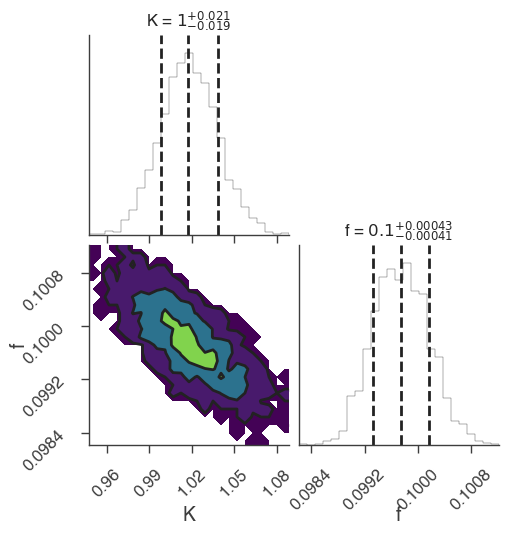

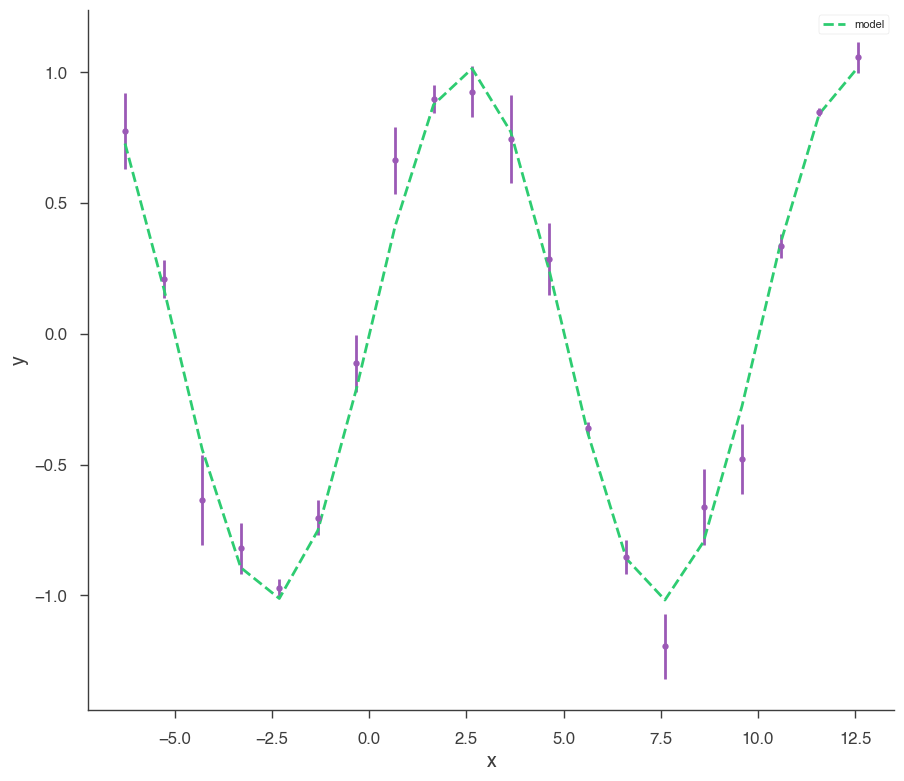

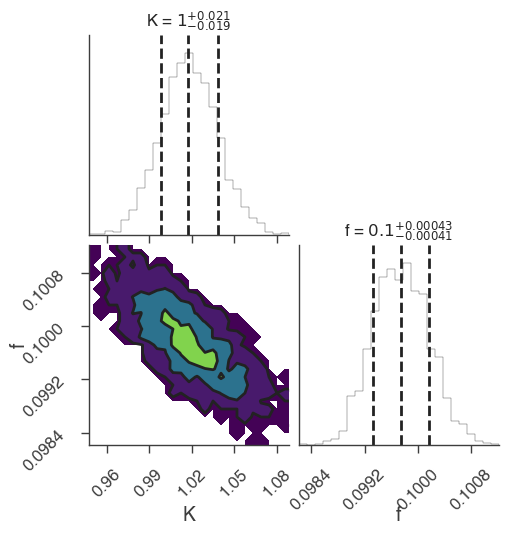

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=84551;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=478473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

128it [00:00, 1276.13it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 147 | eff(%): 19.784 | loglstar:   -inf < -7316.439 <    inf | logz: -7323.558 +/-  0.118 | dlogz: 7286.853 >  0.010]

341it [00:00, 1772.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 493 | eff(%): 34.340 | loglstar:   -inf < -3926.432 <    inf | logz: -3933.080 +/-  0.114 | dlogz: 3894.301 >  0.010]

519it [00:00, 1687.65it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 952 | eff(%): 35.744 | loglstar:   -inf < -2793.909 <    inf | logz: -2801.854 +/-  0.126 | dlogz: 2782.287 >  0.010]

689it [00:00, 1528.75it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1541 | eff(%): 33.758 | loglstar:   -inf < -2232.467 <    inf | logz: -2240.684 +/-  0.126 | dlogz: 2203.415 >  0.010]

844it [00:00, 1207.78it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 2406 | eff(%): 29.043 | loglstar:   -inf < -1933.176 <    inf | logz: -1941.218 +/-  0.119 | dlogz: 1928.119 >  0.010]

974it [00:00, 1156.23it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 3071 | eff(%): 27.275 | loglstar:   -inf < -1733.815 <    inf | logz: -1742.640 +/-  0.132 | dlogz: 1732.169 >  0.010]

1096it [00:00, 985.89it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4119 | eff(%): 23.728 | loglstar:   -inf < -1579.098 <    inf | logz: -1587.058 +/-  0.120 | dlogz: 1572.890 >  0.010] 

1201it [00:01, 801.05it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 5225 | eff(%): 20.978 | loglstar:   -inf < -1463.642 <    inf | logz: -1471.718 +/-  0.123 | dlogz: 1459.982 >  0.010]

1289it [00:01, 712.43it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 6602 | eff(%): 18.150 | loglstar:   -inf < -1357.276 <    inf | logz: -1366.010 +/-  0.125 | dlogz: 1354.213 >  0.010]

1366it [00:01, 640.67it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 7812 | eff(%): 16.434 | loglstar:   -inf < -1090.236 <    inf | logz: -1099.572 +/-  0.133 | dlogz: 1088.719 >  0.010]

1434it [00:01, 582.84it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 9097 | eff(%): 14.942 | loglstar:   -inf < -857.776 <    inf | logz: -866.320 +/-  0.126 | dlogz: 853.927 >  0.010]    

1495it [00:01, 467.04it/s, batch: 0 | bound: 0 | nc: 29 | ncall: 10457 | eff(%): 13.644 | loglstar:   -inf < -712.319 <    inf | logz: -721.981 +/-  0.136 | dlogz: 711.071 >  0.010]

1546it [00:02, 398.84it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 11722 | eff(%): 12.649 | loglstar:   -inf < -614.876 <    inf | logz: -624.110 +/-  0.133 | dlogz: 612.140 >  0.010] 

1589it [00:02, 333.22it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 13127 | eff(%): 11.661 | loglstar:   -inf < -550.756 <    inf | logz: -559.911 +/-  0.129 | dlogz: 547.465 >  0.010]

1626it [00:02, 299.07it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 14428 | eff(%): 10.892 | loglstar:   -inf < -512.318 <    inf | logz: -521.731 +/-  0.132 | dlogz: 509.623 >  0.010]

1658it [00:02, 281.64it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 15418 | eff(%): 10.416 | loglstar:   -inf < -474.376 <    inf | logz: -483.575 +/-  0.129 | dlogz: 472.686 >  0.010]

1687it [00:02, 215.62it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16316 | eff(%): 10.032 | loglstar:   -inf < -451.109 <    inf | logz: -461.305 +/-  0.141 | dlogz: 452.696 >  0.010] 

1888it [00:02, 533.70it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 16654 | eff(%): 11.006 | loglstar:   -inf < -302.884 <    inf | logz: -312.050 +/-  0.128 | dlogz: 300.478 >  0.010]

2044it [00:03, 740.77it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 17044 | eff(%): 11.651 | loglstar:   -inf < -218.335 <    inf | logz: -227.346 +/-  0.130 | dlogz: 215.241 >  0.010]

2145it [00:03, 668.11it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 17207 | eff(%): 12.114 | loglstar:   -inf < -185.627 <    inf | logz: -194.682 +/-  0.126 | dlogz: 182.315 >  0.010]

2309it [00:03, 871.31it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 17595 | eff(%): 12.760 | loglstar:   -inf < -137.513 <    inf | logz: -146.584 +/-  0.130 | dlogz: 133.934 >  0.010]

2419it [00:03, 759.48it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 17835 | eff(%): 13.193 | loglstar:   -inf < -112.023 <    inf | logz: -121.479 +/-  0.132 | dlogz: 108.635 >  0.010]

2615it [00:03, 1015.00it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18159 | eff(%): 14.015 | loglstar:   -inf < -79.338 <    inf | logz: -89.134 +/-  0.131 | dlogz: 75.893 >  0.010]  

2770it [00:03, 1138.46it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18555 | eff(%): 14.537 | loglstar:   -inf < -58.273 <    inf | logz: -67.707 +/-  0.129 | dlogz: 54.051 >  0.010]

2904it [00:03, 941.97it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18754 | eff(%): 15.083 | loglstar:   -inf < -46.178 <    inf | logz: -55.583 +/-  0.129 | dlogz: 41.629 >  0.010] 

3074it [00:04, 1108.58it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19096 | eff(%): 15.687 | loglstar:   -inf < -34.761 <    inf | logz: -44.032 +/-  0.129 | dlogz: 29.713 >  0.010]

3204it [00:04, 912.18it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19359 | eff(%): 16.134 | loglstar:   -inf < -27.956 <    inf | logz: -37.476 +/-  0.131 | dlogz: 22.896 >  0.010] 

3410it [00:04, 1155.78it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 19684 | eff(%): 16.895 | loglstar:   -inf < -21.379 <    inf | logz: -30.652 +/-  0.129 | dlogz: 15.641 >  0.010]

3577it [00:04, 1273.57it/s, batch: 0 | bound: 5 | nc: 9 | ncall: 20060 | eff(%): 17.398 | loglstar:   -inf < -17.301 <    inf | logz: -26.726 +/-  0.130 | dlogz: 11.378 >  0.010]

3724it [00:04, 1139.37it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20248 | eff(%): 17.949 | loglstar:   -inf < -14.939 <    inf | logz: -24.274 +/-  0.130 | dlogz:  8.627 >  0.010]

3910it [00:04, 1308.15it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20608 | eff(%): 18.524 | loglstar:   -inf < -12.996 <    inf | logz: -22.293 +/-  0.129 | dlogz:  6.271 >  0.010]

4057it [00:04, 1069.29it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 20881 | eff(%): 18.975 | loglstar:   -inf < -11.829 <    inf | logz: -21.183 +/-  0.129 | dlogz:  4.872 >  0.010]

4266it [00:04, 1292.91it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 21193 | eff(%): 19.665 | loglstar:   -inf < -10.515 <    inf | logz: -19.946 +/-  0.129 | dlogz:  3.247 >  0.010]

4435it [00:05, 1072.23it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21561 | eff(%): 20.103 | loglstar:   -inf < -9.849 <    inf | logz: -19.247 +/-  0.129 | dlogz:  2.277 >  0.010] 

4648it [00:05, 1293.35it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 21860 | eff(%): 20.787 | loglstar:   -inf < -9.249 <    inf | logz: -18.645 +/-  0.130 | dlogz:  1.417 >  0.010]

4812it [00:05, 1370.98it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 22214 | eff(%): 21.185 | loglstar:   -inf < -8.963 <    inf | logz: -18.336 +/-  0.130 | dlogz:  0.976 >  0.010]

4968it [00:05, 1107.94it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22442 | eff(%): 21.655 | loglstar:   -inf < -8.773 <    inf | logz: -18.127 +/-  0.129 | dlogz:  0.684 >  0.010]

5177it [00:05, 1319.55it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22770 | eff(%): 22.248 | loglstar:   -inf < -8.581 <    inf | logz: -17.934 +/-  0.129 | dlogz:  0.427 >  0.010]

5332it [00:05, 1069.10it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23100 | eff(%): 22.593 | loglstar:   -inf < -8.493 <    inf | logz: -17.836 +/-  0.129 | dlogz:  0.303 >  0.010]

5541it [00:06, 1280.89it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23415 | eff(%): 23.170 | loglstar:   -inf < -8.399 <    inf | logz: -17.744 +/-  0.129 | dlogz:  0.193 >  0.010]

5711it [00:06, 1376.24it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23786 | eff(%): 23.516 | loglstar:   -inf < -8.349 <    inf | logz: -17.693 +/-  0.129 | dlogz:  0.135 >  0.010]

5869it [00:06, 1134.26it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 23992 | eff(%): 23.963 | loglstar:   -inf < -8.313 <    inf | logz: -17.658 +/-  0.129 | dlogz:  0.097 >  0.010]

6066it [00:06, 1314.59it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 24325 | eff(%): 24.435 | loglstar:   -inf < -8.285 <    inf | logz: -17.628 +/-  0.129 | dlogz:  0.064 >  0.010]

6219it [00:06, 1073.04it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24626 | eff(%): 24.751 | loglstar:   -inf < -8.268 <    inf | logz: -17.612 +/-  0.129 | dlogz:  0.047 >  0.010]

6437it [00:06, 1305.34it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24930 | eff(%): 25.313 | loglstar:   -inf < -8.252 <    inf | logz: -17.596 +/-  0.129 | dlogz:  0.030 >  0.010]

6622it [00:06, 1429.90it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 25295 | eff(%): 25.672 | loglstar:   -inf < -8.243 <    inf | logz: -17.587 +/-  0.129 | dlogz:  0.021 >  0.010]

6786it [00:07, 1159.60it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 25507 | eff(%): 26.093 | loglstar:   -inf < -8.237 <    inf | logz: -17.581 +/-  0.129 | dlogz:  0.015 >  0.010]

6976it [00:07, 1319.77it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25836 | eff(%): 26.488 | loglstar:   -inf < -8.232 <    inf | logz: -17.576 +/-  0.129 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7485it [00:07, 887.43it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26363 | eff(%): 28.392 | loglstar: -10.001 < -8.956 < -8.710 | logz: -17.566 +/-  0.133 | stop:  1.484]           

7687it [00:08, 1022.06it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 26640 | eff(%): 28.310 | loglstar: -10.001 < -9.394 < -8.710 | logz: -17.566 +/-  0.133 | stop:  1.484]

7862it [00:08, 1127.87it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26997 | eff(%): 28.579 | loglstar: -10.001 < -9.068 < -8.710 | logz: -17.566 +/-  0.133 | stop:  1.484]

8020it [00:08, 1030.65it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27266 | eff(%): 28.871 | loglstar: -10.001 < -8.829 < -8.710 | logz: -17.566 +/-  0.133 | stop:  1.484]

8427it [00:08, 1558.76it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27760 | eff(%): 30.144 | loglstar: -10.001 < -8.388 < -8.710 | logz: -17.566 +/-  0.133 | stop:  1.484]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8643it [00:09, 683.38it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27984 | eff(%): 30.333 | loglstar: -10.501 < -10.381 < -9.994 | logz: -17.573 +/-  0.109 | stop:  1.168]

9129it [00:09, 1116.39it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28494 | eff(%): 31.920 | loglstar: -10.501 < -8.645 < -9.994 | logz: -17.573 +/-  0.109 | stop:  1.168]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9387it [00:10, 650.77it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28774 | eff(%): 32.110 | loglstar: -10.922 < -10.130 < -10.486 | logz: -17.574 +/-  0.102 | stop:  1.075]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9809it [00:10, 659.22it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29234 | eff(%): 33.553 | loglstar: -10.922 < -8.228 < -10.486 | logz: -17.574 +/-  0.102 | stop:  0.878] 

9809it [00:10, 904.44it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29234 | eff(%): 33.553 | loglstar: -10.922 < -8.228 < -10.486 | logz: -17.574 +/-  0.102 | stop:  0.878]

05:00:20 INFO      fit restored to maximum of posterior                                         ]8;id=913667;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=336902;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=281089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=72945;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 +/- 0.020,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.241082
total,-8.241082


Values of statistical measures:

,statistical measures
AIC,21.188046
BIC,22.473628
DIC,20.372732
PDIC,1.943852
log(Z),-7.628131


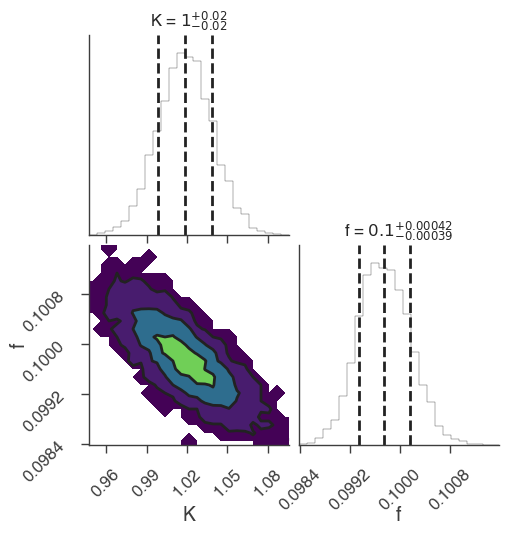

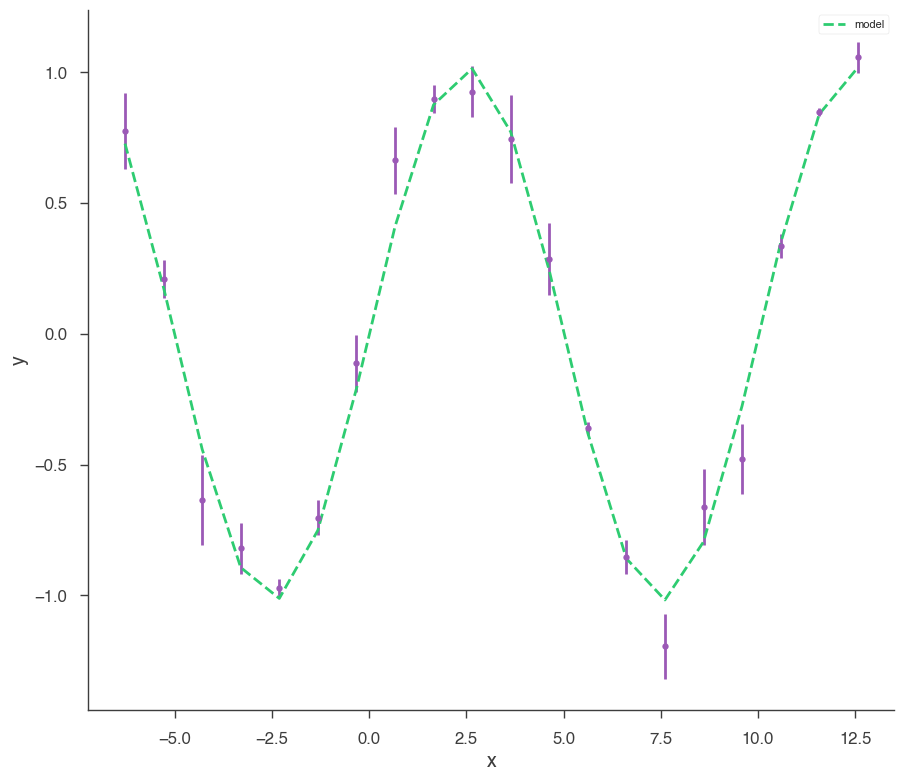

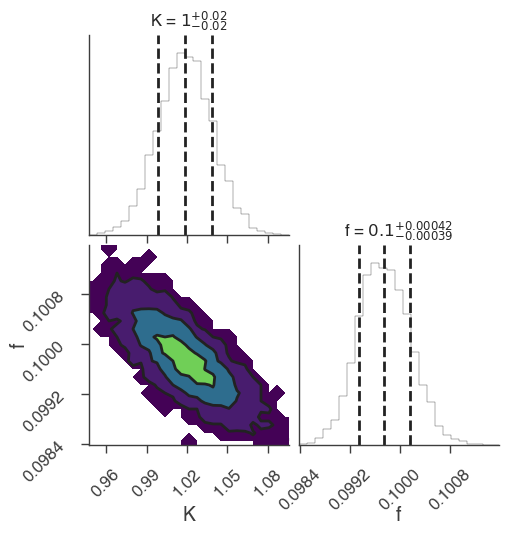

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=355269;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=99975;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 55.36it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:10, 57.14it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:09, 64.27it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 67.72it/s]

Sampling progress :   6%|▌         | 37/625 [00:00<00:08, 73.09it/s]

Sampling progress :   7%|▋         | 45/625 [00:00<00:08, 69.41it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:08, 69.09it/s]

Sampling progress :  10%|▉         | 60/625 [00:00<00:08, 65.37it/s]

Sampling progress :  11%|█         | 67/625 [00:01<00:08, 66.45it/s]

Sampling progress :  12%|█▏        | 74/625 [00:01<00:08, 66.39it/s]

Sampling progress :  13%|█▎        | 81/625 [00:01<00:08, 61.11it/s]

Sampling progress :  14%|█▍        | 88/625 [00:01<00:08, 62.35it/s]

Sampling progress :  15%|█▌        | 95/625 [00:01<00:08, 63.47it/s]

Sampling progress :  16%|█▋        | 102/625 [00:01<00:08, 64.18it/s]

Sampling progress :  18%|█▊        | 110/625 [00:01<00:07, 66.54it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:07, 69.88it/s]

Sampling progress :  20%|██        | 127/625 [00:01<00:06, 71.72it/s]

Sampling progress :  22%|██▏       | 135/625 [00:01<00:06, 74.01it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:06, 77.40it/s]

Sampling progress :  24%|██▍       | 153/625 [00:02<00:05, 79.87it/s]

Sampling progress :  26%|██▌       | 162/625 [00:02<00:06, 76.99it/s]

Sampling progress :  27%|██▋       | 170/625 [00:02<00:06, 73.68it/s]

Sampling progress :  29%|██▊       | 179/625 [00:02<00:05, 76.07it/s]

Sampling progress :  30%|██▉       | 187/625 [00:02<00:05, 74.69it/s]

Sampling progress :  31%|███       | 195/625 [00:02<00:05, 75.55it/s]

Sampling progress :  32%|███▏      | 203/625 [00:02<00:05, 73.06it/s]

Sampling progress :  34%|███▍      | 212/625 [00:03<00:05, 75.88it/s]

Sampling progress :  35%|███▌      | 220/625 [00:03<00:05, 73.76it/s]

Sampling progress :  36%|███▋      | 228/625 [00:03<00:05, 72.65it/s]

Sampling progress :  38%|███▊      | 236/625 [00:03<00:05, 72.03it/s]

Sampling progress :  39%|███▉      | 244/625 [00:03<00:05, 72.36it/s]

Sampling progress :  40%|████      | 252/625 [00:03<00:05, 74.26it/s]

Sampling progress :  42%|████▏     | 260/625 [00:03<00:05, 71.69it/s]

Sampling progress :  43%|████▎     | 268/625 [00:03<00:04, 72.63it/s]

Sampling progress :  44%|████▍     | 276/625 [00:03<00:04, 73.72it/s]

Sampling progress :  45%|████▌     | 284/625 [00:04<00:04, 74.19it/s]

Sampling progress :  47%|████▋     | 292/625 [00:04<00:04, 75.51it/s]

Sampling progress :  48%|████▊     | 300/625 [00:04<00:04, 76.72it/s]

Sampling progress :  49%|████▉     | 309/625 [00:04<00:03, 79.27it/s]

Sampling progress :  51%|█████     | 317/625 [00:04<00:03, 78.14it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:04<00:03, 78.23it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:04<00:03, 75.06it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:04<00:03, 77.11it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:04<00:03, 71.42it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:04<00:03, 71.80it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:05<00:03, 73.16it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:05<00:03, 74.98it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:05<00:03, 77.26it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:05<00:03, 77.49it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:05<00:02, 77.91it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:05<00:02, 78.29it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:05<00:02, 78.70it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:05<00:02, 74.58it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:05<00:02, 73.51it/s]

Sampling progress :  70%|███████   | 439/625 [00:06<00:02, 74.89it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:06<00:02, 71.14it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:06<00:02, 72.48it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:06<00:02, 69.08it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:06<00:02, 70.35it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:06<00:02, 63.83it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:06<00:02, 66.87it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:06<00:01, 66.99it/s]

Sampling progress :  80%|████████  | 502/625 [00:06<00:01, 69.16it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:07<00:01, 73.93it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:07<00:01, 73.41it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:07<00:01, 75.00it/s]

Sampling progress :  86%|████████▌ | 535/625 [00:07<00:01, 72.61it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:07<00:01, 74.63it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:07<00:00, 77.57it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:07<00:00, 80.37it/s]

Sampling progress :  91%|█████████ | 570/625 [00:07<00:00, 82.28it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:07<00:00, 80.86it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:08<00:00, 76.88it/s]

Sampling progress :  95%|█████████▌| 596/625 [00:08<00:00, 74.75it/s]

Sampling progress :  97%|█████████▋| 604/625 [00:08<00:00, 73.82it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:08<00:00, 73.57it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:08<00:00, 72.15it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 72.76it/s]

05:00:29 INFO      fit restored to maximum of posterior                                         ]8;id=411537;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=673388;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=839399;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=548739;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 35


Scale Factor: 1.245148


Mean Integrated Autocorrelation Time: 3.49


Effective Sample Size: 3580.07


Number of Log Probability Evaluations: 64858


Effective Samples per Log Probability Evaluation: 0.055199


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 -0.021 +0.020,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.241203
total,-8.241203


Values of statistical measures:

,statistical measures
AIC,21.188289
BIC,22.473871
DIC,20.491815
PDIC,2.004323


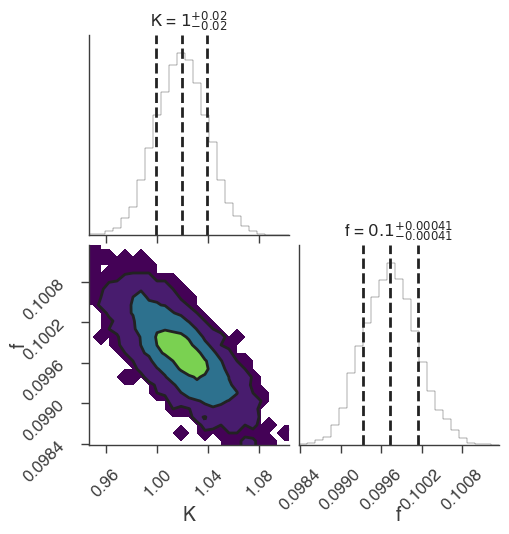

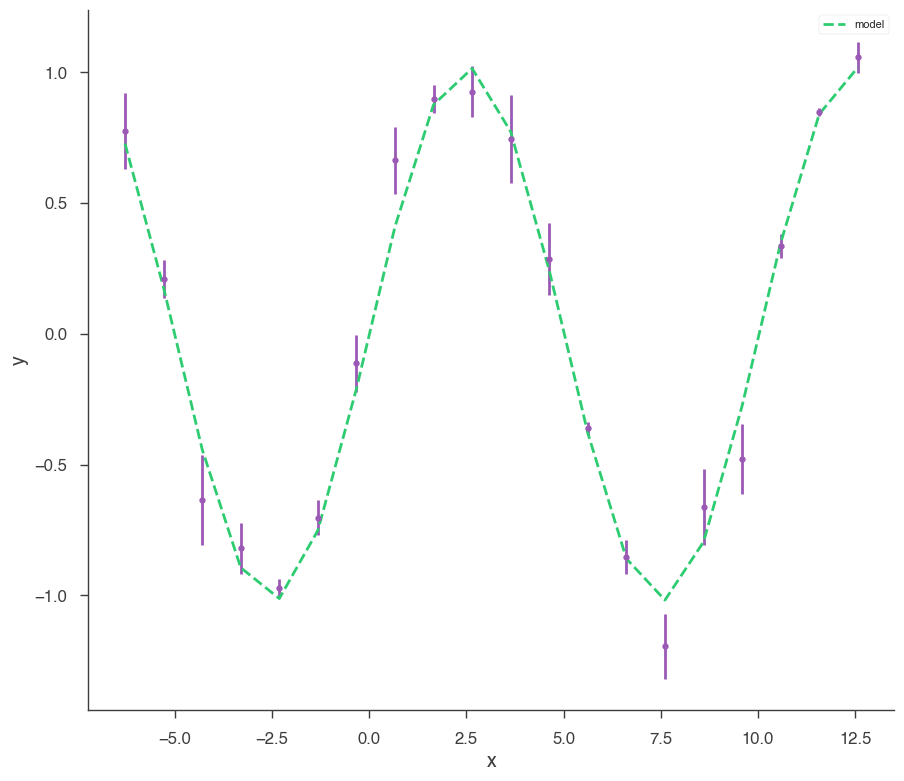

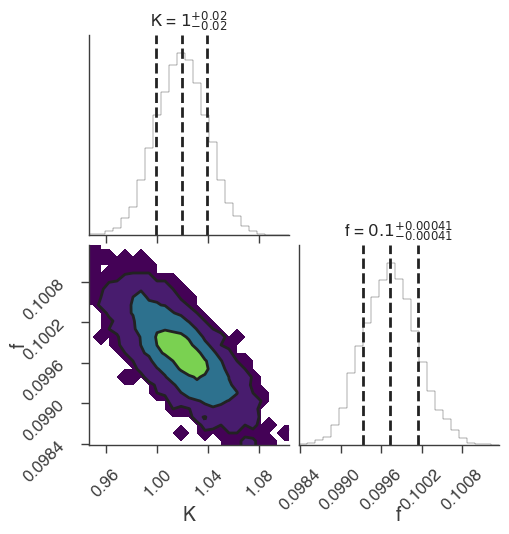

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

05:00:30 INFO      sampler set to ultranest                                                ]8;id=457552;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=605767;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 8949


[ultranest]   logZ = -17.73 +- 0.1257


[ultranest] Effective samples strategy satisfied (ESS = 983.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.13 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


05:00:38 INFO      fit restored to maximum of posterior                                         ]8;id=258356;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=339200;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=361183;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=440266;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.019 -0.020 +0.019,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.97 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.242255
total,-8.242255


Values of statistical measures:

,statistical measures
AIC,21.190393
BIC,22.475975
DIC,20.355627
PDIC,1.929672
log(Z),-7.705092


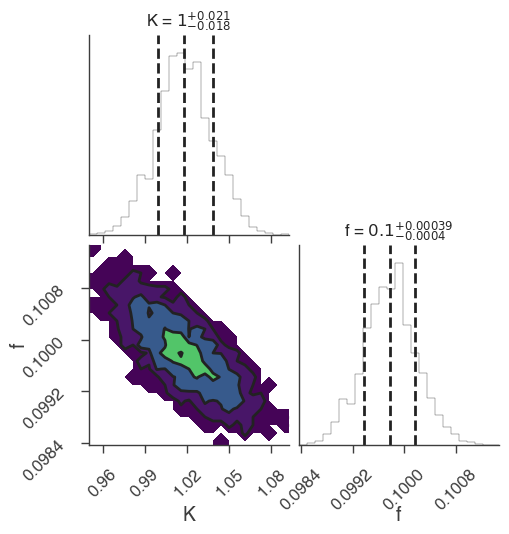

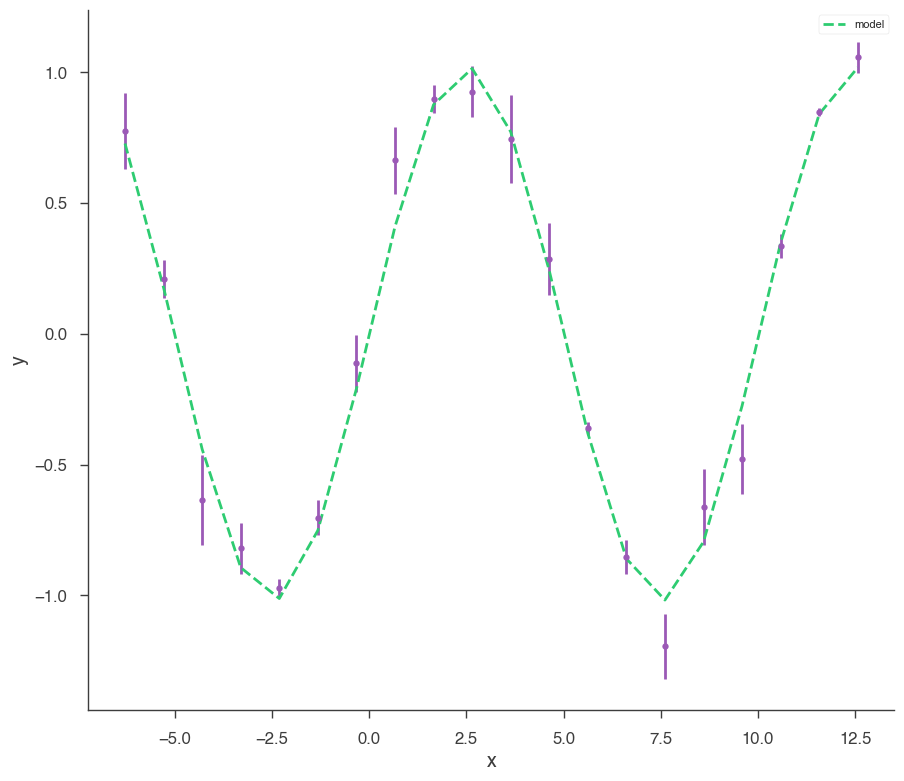

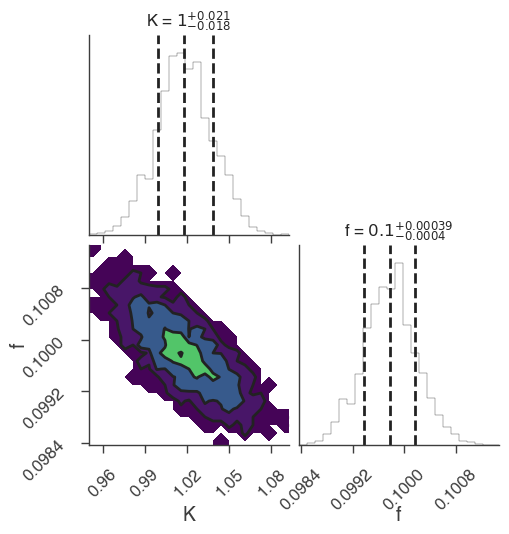

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()